In [14]:
# imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd 
# global array 
countries = ['United States', 'Canada', 'Mexico']

Data Sources:
 
https://ourworldindata.org/fish-and-overfishing#global-fish-production



**Wild Caught Data**

**Aquaculture (farmed) Fish Data**

Author: Sean Carrigan


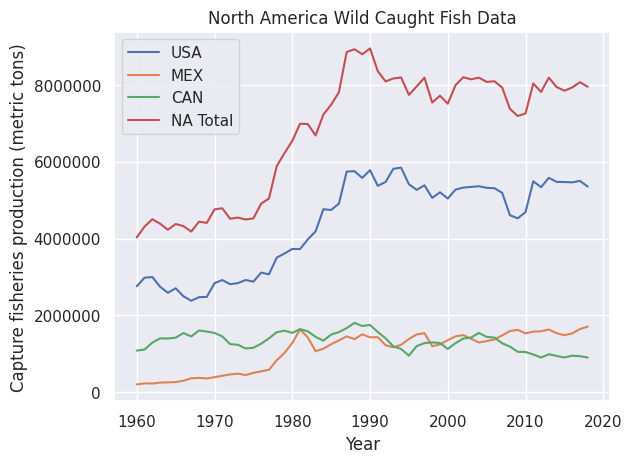

In [15]:
# total wild caught fish by country (does not include farmed fish)
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/capture-fishery-production.csv'
wild_caught_df = pd.read_csv(url)
# print('Wild Caught Data size:', wild_caught_df.shape)

# drop non-essential columns 
wild_caught_df = wild_caught_df.drop(['Code'], axis=1)

# separate US data 
us_wild_data = wild_caught_df[wild_caught_df['Entity'] == 'United States']

# separate Mexico data 
mexico_wild_data = wild_caught_df[wild_caught_df['Entity'] == 'Mexico']

# separate Canada data 
canada_wild_data = wild_caught_df[wild_caught_df['Entity'] == 'Canada']

# separate and group North American data
NA_wild_data = wild_caught_df[wild_caught_df['Entity'].isin(countries)]
wild_grouped_NA = NA_wild_data.groupby('Year')['Capture fisheries production (metric tons)'].sum()

# plot US wild caught data
plt.plot(us_wild_data['Year'], us_wild_data['Capture fisheries production (metric tons)'], label='USA')

# plot Mexico wild caught data
plt.plot(mexico_wild_data['Year'], mexico_wild_data['Capture fisheries production (metric tons)'], label='MEX')

# plot Canada wild caught data
plt.plot(canada_wild_data['Year'], canada_wild_data['Capture fisheries production (metric tons)'], label='CAN')

# plot North America wild caught data 
plt.plot(wild_grouped_NA.index, wild_grouped_NA.values, label= 'NA Total')

print('Author: Sean Carrigan')

# plot details and display 
plt.xlabel('Year')
plt.ylabel('Capture fisheries production (metric tons)')
plt.title('North America Wild Caught Fish Data')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()


^ This graph shows, in metric tons, totals for wild caught fish of the coasts of various locations. Here we can see that that beginning around 1975 North American wild caught production significantly increases. While there is a steep rise in production during this time in Mexico, the main source of this growth comes from the US. The trend line for NA follows the pattern for the US. Canada's wild production has decreased overtime. Mexico production spiked in the late 1970's and has remained at a similar level since. 

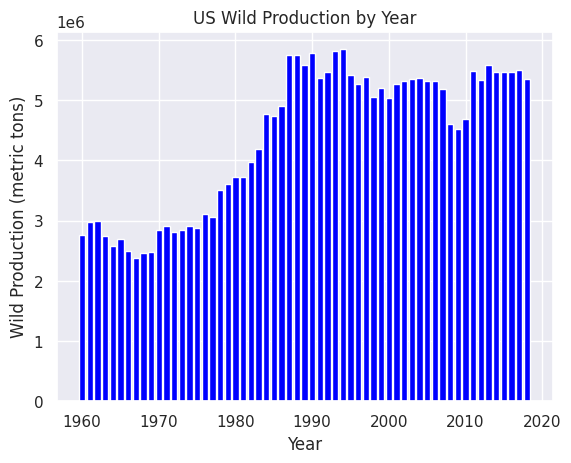

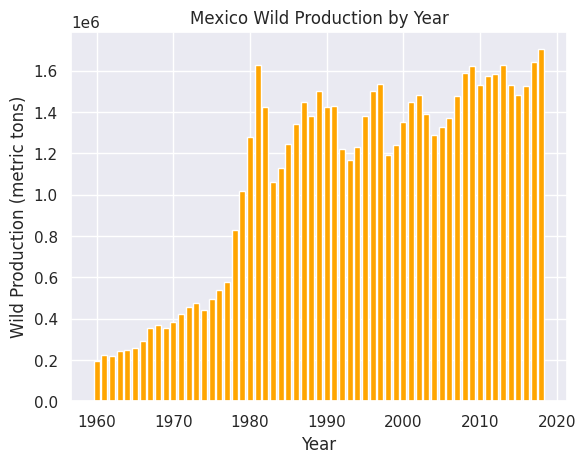

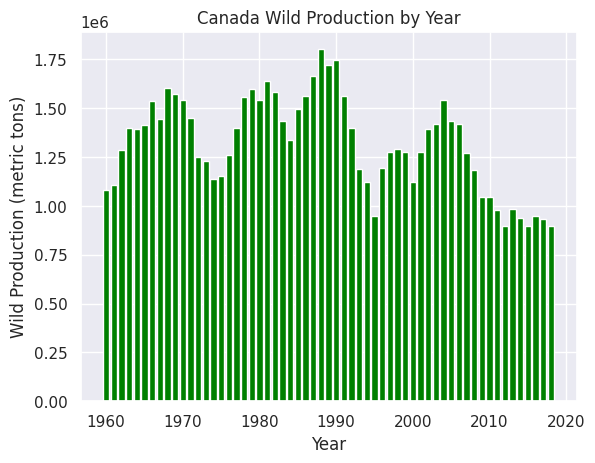

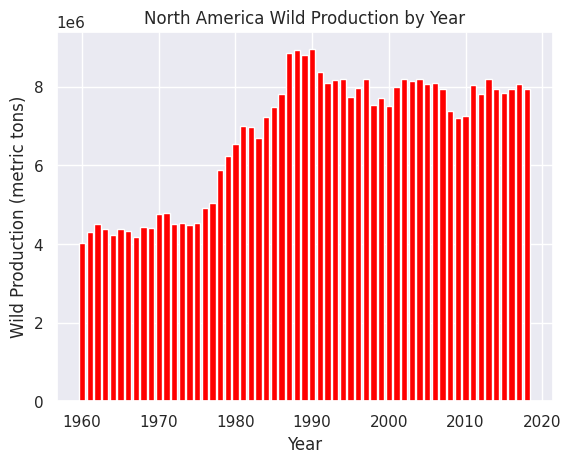

In [16]:
# display US consumption bar chart
plt.bar(us_wild_data['Year'], us_wild_data['Capture fisheries production (metric tons)'], color='blue')
plt.xlabel("Year")
plt.ylabel("Wild Production (metric tons)")
plt.title("US Wild Production by Year")
plt.show()

# display Mexico consumption bar chart
plt.bar(mexico_wild_data['Year'], mexico_wild_data['Capture fisheries production (metric tons)'], color='orange')
plt.xlabel("Year")
plt.ylabel("Wild Production (metric tons)")
plt.title("Mexico Wild Production by Year")
plt.show()

# display Canada consumption bar chart
plt.bar(canada_wild_data['Year'], canada_wild_data['Capture fisheries production (metric tons)'], color='green')
plt.xlabel("Year")
plt.ylabel("Wild Production (metric tons)")
plt.title("Canada Wild Production by Year")
plt.show()

# plot North America wild caught data 
plt.bar(wild_grouped_NA.index, wild_grouped_NA.values, label= 'NA Total', color='red')
plt.xlabel("Year")
plt.ylabel("Wild Production (metric tons)")
plt.title("North America Wild Production by Year")
plt.show()


^ Similar to the line graphs above, these bar charts show consumption trends for each individual contry in bar chart form. 

Author: Sean Carrigan


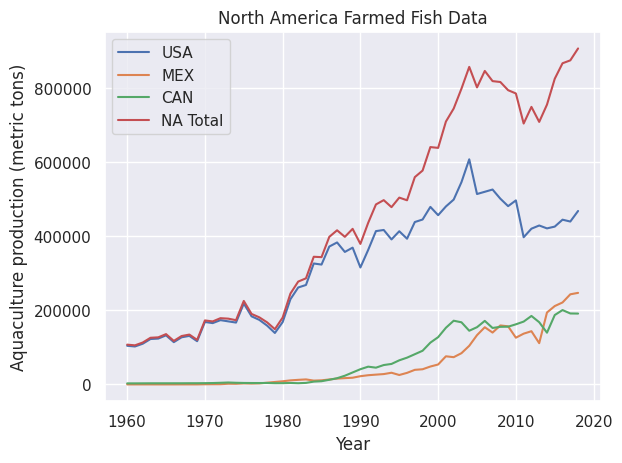

In [4]:
# total farmed fish by country (does not include wild caught fish)
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/aquaculture-farmed-fish-production.csv'
farmed_df = pd.read_csv(url)

# drop non-essential columns 
farmed_df = farmed_df.drop(['Code'], axis=1)

# separate US data 
us_farmed_data = farmed_df[farmed_df['Entity'] == 'United States']

# separate Mexico data 
mexico_farmed_data = farmed_df[farmed_df['Entity'] == 'Mexico']

# separate Canada data 
canada_farmed_data = farmed_df[farmed_df['Entity'] == 'Canada']

# separate and group North American data
NA_farmed_data = farmed_df[farmed_df['Entity'].isin(countries)]
farmed_grouped_NA = NA_farmed_data.groupby('Year')['Aquaculture production (metric tons)'].sum()

# plot US farmed data
plt.plot(us_farmed_data['Year'], us_farmed_data['Aquaculture production (metric tons)'], label='USA')

# plot Mexico farmed data
plt.plot(mexico_farmed_data['Year'], mexico_farmed_data['Aquaculture production (metric tons)'], label='MEX')

# plot Canada farmed data
plt.plot(canada_farmed_data['Year'], canada_farmed_data['Aquaculture production (metric tons)'], label='CAN')

# plot North America farmed data 
plt.plot(farmed_grouped_NA.index, farmed_grouped_NA.values, label= 'NA Total')

print('Author: Sean Carrigan')

# plot details and display 
plt.xlabel('Year')
plt.ylabel('Aquaculture production (metric tons)')
plt.title('North America Farmed Fish Data')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()


^ This graph shows, in metric tons, totals for wild caught fish

**Wild Caught vs. Farmed Production**

^ This graph shows the overall production data for farmed vs. wild fish and seafood produciton. As we can see, farmed production has slightly increased over time. While wild production has dramatically increased. 

In [19]:
# # imports
# import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import STL
# from sklearn.metrics import mean_squared_error
# from statsmodels.tsa.arima.model import ARIMA

# url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/fish-and-seafood-consumption-per-capita.csv'
# consumption_df = pd.read_csv('/content/fish-and-seafood-consumption-per-capita.csv')
# consumption_df.rename(columns={'Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita' : 'Consumption (kg/capita/yr)'}, inplace=True)


# # separate and plot US data
# consumption_df['years'] = pd.to_datetime(consumption_df['Year'], format='%Y')
# consumption_df.set_index('years', inplace=True)
# us_data = consumption_df[consumption_df['Code'] == 'USA']['Consumption (kg/capita/yr)']
# # print(us_data.head())

# # apply STL decomposition
# stl = STL(us_data, period=12, seasonal=13)
# res = stl.fit()

# # separate trend, seasonal, and residual components
# trend = res.trend
# seasonal = res.seasonal
# resid = res.resid

# # fit separate ARIMA models to each component
# model_trend = ARIMA(trend, order=(1, 1, 1))
# model_seasonal = ARIMA(seasonal, order=(1, 0, 0))
# model_resid = ARIMA(resid, order=(1, 1, 1))
# model_trend_fit = model_trend.fit()
# model_seasonal_fit = model_seasonal.fit()
# model_resid_fit = model_resid.fit()

# # predict future values for each component
# future_years = pd.date_range(start='2018-01-01', end='2030-01-01', freq='AS')
# pred_trend = model_trend_fit.forecast(len(future_years))
# pred_seasonal = model_seasonal_fit.forecast(len(future_years))
# pred_resid = model_resid_fit.forecast(len(future_years))

# # combine forecasted components
# pred = pred_trend + pred_seasonal + pred_resid

# # plot actual and predicted values
# plt.plot(us_data.index, us_data, label='Actual')
# plt.plot(pred.index, pred, label='Predicted')
# plt.legend()
# plt.show()


# model = ARIMA(us_data['Consumption (kg/capita/yr)'], order=(1, 1, 1))
# model_fit = model.fit()

# # make predictions for the next 5 years
# future_years = pd.date_range(start='2019-01-01', end='2023-01-01', freq='YS')
# predictions = model_fit.forecast(steps=len(future_years))[0]

# # plot actual and predicted values
# plt.plot(us_data.index, us_data['Consumption (kg/capita/yr)'], label='Actual')
# plt.plot(future_years, predictions, label='Predicted')
# plt.legend()
# plt.show()

# print(us_data)

# # separate Mexico 
# mexico_data = consumption_df[consumption_df['Entity'] == 'Mexico']

# # separate Canada data
# canada_data = consumption_df[consumption_df['Entity'] == 'Canada']

# # separate and group North American data
# NA_data = consumption_df[consumption_df['Entity'].isin(countries)]
# grouped_NA = NA_data.groupby('Year')['Consumption (kg/capita/yr)'].sum()

# # plot US consumption trends
# # print('Size of US data:', us_data.shape)
# plt.plot(us_data['Year'], us_data['Consumption (kg/capita/yr)'], label='USA')

# # plot Mexico consumption trends
# plt.plot(mexico_data['Year'], mexico_data['Consumption (kg/capita/yr)'], label='MEX')

# # plot Canada consumption trends
# plt.plot(canada_data['Year'], canada_data['Consumption (kg/capita/yr)'], label='CAN')


# #plot North American consumption trends
# print('Size of NA data:', grouped_NA.shape)
# plt.plot(grouped_NA.index, grouped_NA.values, label= 'NA Total')

# print('Author: Sean Carrigan')

# # plot details and display
# plt.xlabel('Year')
# plt.xlim(1960, 2020)
# plt.ylabel('Consumption (kg/capita/yr)')
# plt.title('North America Fish and Seafood Consumption Data')
# plt.legend()
# plt.show()

^ This graph shows the trends of overall fish and seafood consumption for North Americans from 1960-2018. The data is saparated by country along with the aggregate consumption data for NA all together. It is interesting to note here how the overall NA trend follows a similar pattern to that of Mexico. 

US Meat Consumption - https://ourworldindata.org/grapher/per-capita-meat-usa  
Median Household Income - https://fred.stlouisfed.org/series/MEHOINUSA672N  
GDP Data - https://fred.stlouisfed.org/series/GDPC1

In [21]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# import seaborn as sns

# # US Fish Consumption
# consumption_df = pd.read_csv('/content/fish-and-seafood-consumption-per-capita.csv')
# consumption_df.rename(columns={'Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita' : 'Fish Consumption (kg/capita/yr)'}, inplace=True)
# us_fish_consumption = consumption_df.loc[consumption_df['Code'] == 'USA', ['Year', 'Fish Consumption (kg/capita/yr)']]

# # US Meat Consumption 
# us_meat_consumption = pd.read_csv('/content/per-capita-meat-usa.csv')
# us_meat_consumption['Meat Consumption (kg/capita/yr)'] = us_meat_consumption['Per capita poultry consumption'] + us_meat_consumption['Per capita pork consumption'] + us_meat_consumption['Per capita beef consumption']
# us_meat_consumption = us_meat_consumption.drop(['Code', 'Per capita poultry consumption', 'Per capita pork consumption', 'Per capita beef consumption'], axis=1)

# # US Median Household Income
# us_median_income = pd.read_csv('/content/MEHOINUSA.csv')
# us_median_income = us_median_income.rename(columns={'MEHOINUSA672N': 'Median Household Income (2021 adjusted $)'})
# us_median_income = us_median_income.rename(columns={'DATE': 'Year'})
# us_median_income['Year'] = pd.to_datetime(us_median_income['Year']).dt.strftime('%Y')
# # us_median_income['Year'] = us_median_income['Year'].astype(int)

# # US GDP Data
# gdp_df = pd.read_csv('/content/GDPdata.csv')
# gdp_df = gdp_df.rename(columns={'GDPC1': 'US GDP Billions USD'})
# gdp_df = gdp_df.rename(columns={'DATE': 'Year'})
# gdp_df['Year'] = pd.to_datetime(gdp_df['Year'])
# gdp_df.set_index('Year', inplace=True)
# gdp_df = gdp_df.resample('Y').sum()
# gdp_df = gdp_df.reset_index()
# gdp_df['Year'] = pd.to_datetime(gdp_df['Year']).dt.strftime('%Y')
# # print(gdp_df.head())

# # US disposable income
# disposable_df = pd.read_csv('/content/disposableIncome.csv')
# disposable_df = disposable_df.rename(columns={'A229RX0': 'US Disposable Income in USD'})
# disposable_df = disposable_df.rename(columns={'DATE': 'Year'})
# disposable_df['Year'] = pd.to_datetime(disposable_df['Year'])
# # set date column as the index
# disposable_df.set_index('Year', inplace=True)
# # resample to annual frequency and calculate the mean for each year
# disposable_df = disposable_df.resample('A').mean()
# # reset index so that Year becomes a regular column
# disposable_df = disposable_df.reset_index()
# disposable_df['Year'] = pd.to_datetime(disposable_df['Year']).dt.strftime('%Y')


# # print(disposable_df.head())
# # print(disposable_df.columns)

# # format 'Year' column to match for merging
# us_meat_consumption['Year'] = pd.to_datetime(us_meat_consumption['Year'], format='%Y')
# us_median_income['Year'] = pd.to_datetime(us_median_income['Year'], format='%Y')
# us_fish_consumption['Year'] = pd.to_datetime(us_fish_consumption['Year'], format='%Y')
# gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format='%Y')
# disposable_df['Year'] = pd.to_datetime(disposable_df['Year'], format='%Y')

# # Merge all df columns into one 
# merged_df = pd.merge(us_meat_consumption, us_median_income[['Year', 'Median Household Income (2021 adjusted $)']], on='Year')
# merged_df = pd.merge(merged_df, us_fish_consumption[['Year', 'Fish Consumption (kg/capita/yr)']], on='Year')
# merged_df = pd.merge(merged_df, gdp_df[['Year', 'US GDP Billions USD']], on='Year')
# merged_df = pd.merge(merged_df, disposable_df[['Year', 'US Disposable Income in USD']], on='Year')
# merged_df = merged_df.drop(['Entity'], axis=1)
# # print(merged_df.head())

# # Scale data
# scaler = MinMaxScaler()
# merged_df[['Meat Consumption (kg/capita/yr)', 'US Disposable Income in USD', 'Median Household Income (2021 adjusted $)', 'Fish Consumption (kg/capita/yr)', 'US GDP Billions USD']] = scaler.fit_transform(merged_df[['Meat Consumption (kg/capita/yr)', 'US Disposable Income in USD', 'Median Household Income (2021 adjusted $)', 'Fish Consumption (kg/capita/yr)','US GDP Billions USD']])
# X = merged_df[['US Disposable Income in USD', 'Meat Consumption (kg/capita/yr)', 'Median Household Income (2021 adjusted $)', 'US GDP Billions USD']].values
# y = merged_df['Fish Consumption (kg/capita/yr)']

# model = LinearRegression().fit(X,y)


# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)
# print('R-squared:', model.score(X, y))

# # # Plot 'Meat Consumption' and 'Median Household Income' columns
# # merged_df.plot(x='Year', y=['Fish Consumption (kg/capita/yr)', 'Meat Consumption (kg/capita/yr)', 'US GDP Billions USD'], kind='line')

# # # Add axis labels and a title
# # plt.xlabel('Year')
# # plt.ylabel('Per Capita Consumption')
# # plt.title('Meat Consumption vs. Median Household Income')
# # plt.show()


# plt.scatter(X[:,0], y, color='blue')
# plt.scatter(X[:,3], y, color='green')
# plt.plot(X[:,0], model.predict(X), color='red', linewidth=2)
# plt.title('Fish Consumption vs Meat Consumption and GDP')
# plt.xlabel('Meat Consumption and GDP')
# plt.ylabel('Fish Consumption')
# plt.legend(['Linear Regression', 'Meat Consumption', 'GDP'])
# plt.show()



In [13]:
# from sklearn.preprocessing import PolynomialFeatures

# X2 = merged_df[['Meat Consumption (kg/capita/yr)', 'US GDP Billions USD']].values
# y2 = merged_df['Fish Consumption (kg/capita/yr)']

# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)

# # fit a linear regression model on the polynomial features
# model = LinearRegression().fit(X_poly, y2)

# # predict the values of y using the polynomial features
# y2_pred = model.predict(X_poly)

# # plot the data points and polynomial regression line
# import matplotlib.pyplot as plt
# plt.scatter(X[:,0], y2, color='blue')
# plt.scatter(X[:,1], y2, color='green')
# plt.plot(X[:,0], y2_pred, color='red', linewidth=2)
# plt.title('Fish Consumption vs Meat Consumption and GDP (Polynomial Regression)')
# plt.xlabel('Meat Consumption and GDP')
# plt.ylabel('Fish Consumption')
# plt.legend(['Polynomial Regression', 'Meat Consumption', 'GDP'])
# plt.show()

In [22]:
# # Define the input features and target variable
# X = merged_df[['US Disposable Income in USD', 'Meat Consumption (kg/capita/yr)', 'Median Household Income (2021 adjusted $)', 'US GDP Billions USD']]
# y = merged_df['Fish Consumption (kg/capita/yr)']

# # Create an instance of the MinMaxScaler and fit_transform the X values
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Split data into train and test sets
# train_size = int(len(X) * 0.8)
# train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]
# train_y, test_y = y[0:train_size], y[train_size:len(y)]

# # Fit ARIMA model on train set
# model = ARIMA(train_y, order=(3,1,1), exog=train_X)
# model_fit = model.fit()

# # Make predictions on test set
# predictions = model_fit.predict(start=len(train_X), end=len(train_X)+len(test_X)-1, exog=test_X)

# # Inverse scaling on test set and predictions
# scaler = MinMaxScaler()
# test_X = scaler.inverse_transform(test_X)
# test_y = scaler.inverse_transform([test_y])
# predictions = scaler.inverse_transform([predictions])

# # Calculate RMSE
# rmse = np.sqrt(np.mean((predictions - test_y)**2))
# print('Test RMSE: %.3f' % rmse)

# # Plot predicted vs actual values
# plt.plot(test_y.flatten(), label='Actual')
# plt.plot(predictions.flatten(), label='Predicted')
# plt.title('ARIMA Fish Consumption Prediction')
# plt.xlabel('Year')
# plt.ylabel('Fish Consumption (kg/capita/yr)')
# plt.legend()
# plt.show()

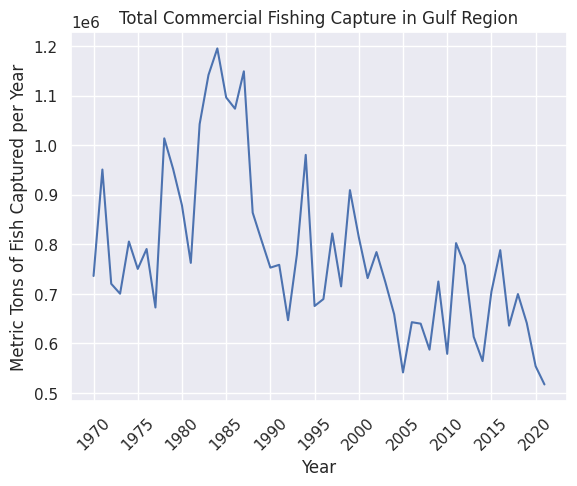

In [24]:
# Gulf Coast Fishing Data
gulf_df = pd.read_csv('/content/GulfCoast_landings.csv', header=1)
gulf_df = gulf_df.drop(['Collection', 'Dollars'], axis=1)

gulf_df['Metric Tons'] = pd.to_numeric(gulf_df['Metric Tons'].str.replace(',', ''))

# Create the bar plot
plt.plot(gulf_df['Year'], gulf_df['Metric Tons'])

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Metric Tons of Fish Captured per Year')
plt.title('Total Commercial Fishing Capture in Gulf Region')

plt.xticks(np.arange(1970, 2021, 5))
plt.xticks(rotation=45)
plt.show()
# print(gulf_df.head())

# print(gulf_df['Pounds'].min())
# print(gulf_df['Metric Tons'].min())



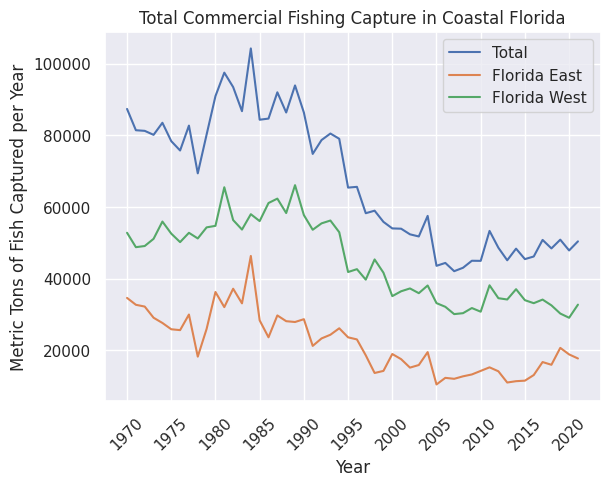

In [26]:
# Florida Totals 
FLTotal_df = pd.read_csv('/content/FloridaTotals_landings.csv', header=1)
FLEast_df = pd.read_csv('/content/FLEast_landings.csv', header=1)
FLWest_df = pd.read_csv('/content/FLWest_landings.csv', header=1)

FLTotal_df['Metric Tons'] = pd.to_numeric(FLTotal_df['Metric Tons'].str.replace(',', ''))
FLEast_df['Metric Tons'] = pd.to_numeric(FLEast_df['Metric Tons'].str.replace(',', ''))
FLWest_df ['Metric Tons'] = pd.to_numeric(FLWest_df ['Metric Tons'].str.replace(',', ''))

# plot Florida Total
plt.plot(FLTotal_df['Year'], FLTotal_df['Metric Tons'], label='Total')
# plot Florida East
plt.plot(FLEast_df['Year'], FLEast_df['Metric Tons'], label='Florida East')
# plot Florida West
plt.plot(FLWest_df['Year'], FLWest_df['Metric Tons'], label='Florida West')

plt.xlabel('Year')
plt.ylabel('Metric Tons of Fish Captured per Year')
plt.title('Total Commercial Fishing Capture in Coastal Florida')

plt.xticks(np.arange(1970, 2021, 5))
plt.xticks(rotation=45)
plt.legend()
plt.show()

# What percentage of total regional capture does Florida represent? 

gulf_total_tonnage = gulf_df['Metric Tons'].sum()
FL_total_tonnage = FLTotal_df['Metric Tons'].sum()
percentage = (FL_total_tonnage / gulf_total_tonnage) * 100

# print(percentage)
# print(FLTotal_df.head())

# print(FLTotal_df['Pounds'].min())

# print(FLEast_df.head())
# print(FLWest_df.head())


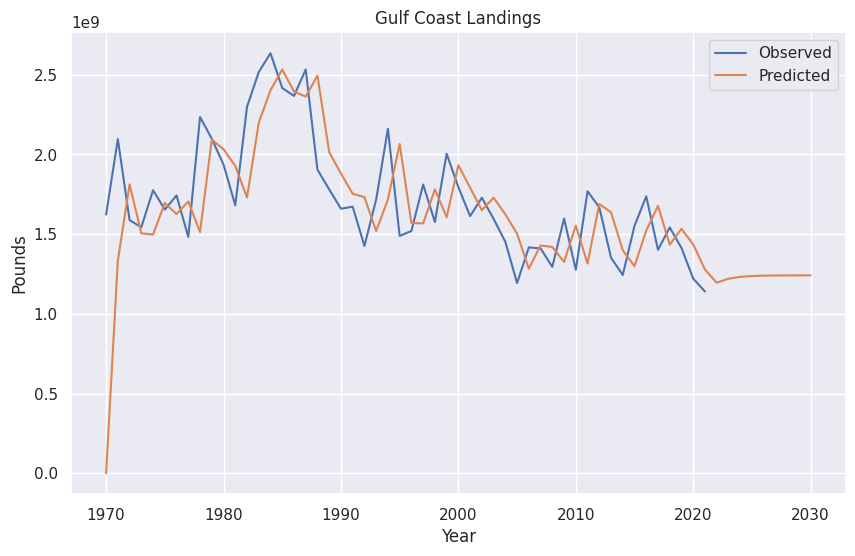

In [30]:
from statsmodels.tsa.arima.model import ARIMA

# read in the data and clean it
gulf_df = pd.read_csv('/content/GulfCoast_landings.csv', header=1)
gulf_df = gulf_df.drop(['Collection', 'Dollars'], axis=1)
gulf_df['Pounds'] = pd.to_numeric(gulf_df['Pounds'].str.replace(',', ''))

# set the frequency of the time series
date_index = pd.date_range(start='1970', end='2021', freq='AS')

# set the date column as the index with the specified frequency
gulf_df = gulf_df.set_index(date_index)

# fit an ARIMA model to the data
model = ARIMA(gulf_df['Pounds'], order=(1,1,1))
model_fit = model.fit()

# make predictions
predictions = model_fit.predict(start='1970-01-01', end='2030-01-01')

# plot the predictions
plt.figure(figsize=(10,6))
plt.plot(gulf_df['Pounds'], label='Observed')
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Pounds')
plt.title('Gulf Coast Landings')
plt.legend()
plt.show()


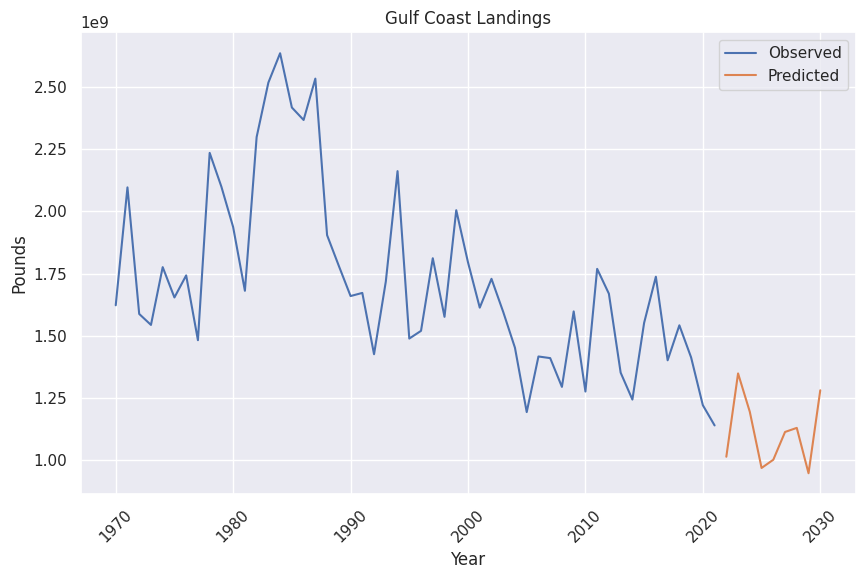

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# read in the data and clean it
gulf_df = pd.read_csv('/content/GulfCoast_landings.csv', header=1)
gulf_df = gulf_df.drop(['Collection', 'Dollars', 'Region Name', 'Metric Tons'], axis=1)
gulf_df['Pounds'] = pd.to_numeric(gulf_df['Pounds'].str.replace(',', ''))

# set the frequency of the time series
date_index = pd.date_range(start='1970', end='2021', freq='AS')

# set the date column as the index with the specified frequency
gulf_df = gulf_df.set_index(date_index)

# fit a SARIMA model to the data
model = SARIMAX(gulf_df['Pounds'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

# make predictions
predictions = model_fit.predict(start='2021-12-01', end='2030-01-01')

# plot the predictions
plt.figure(figsize=(10,6))
plt.plot(gulf_df['Pounds'], label='Observed')
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Pounds')
plt.title('Gulf Coast Landings')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Coefficient: [0.094403]
Intercept: 0.2253914570911149


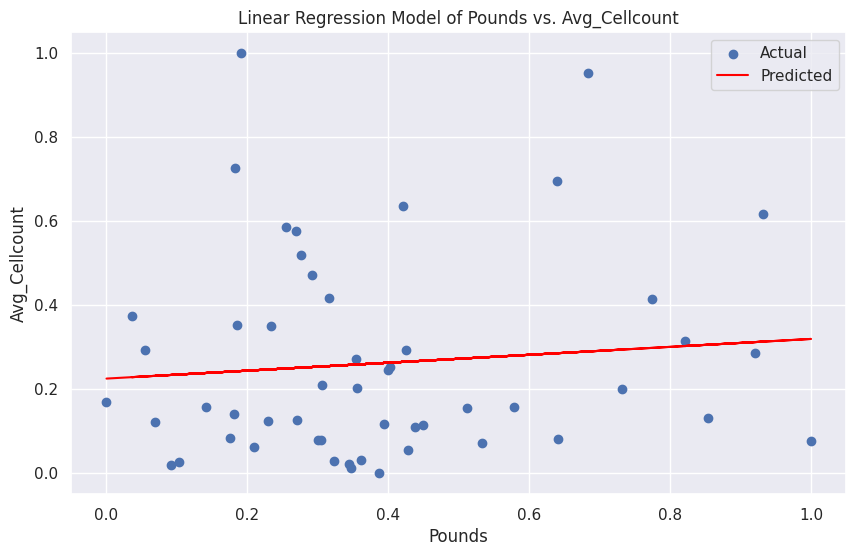

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

cellcount_df = pd.read_csv('/content/cellcount_and_date.csv')
cellcount_df = cellcount_df.drop("Unnamed: 0", axis=1)

# convert SAMPLE_DATE column to datetime format
cellcount_df['SAMPLE_DATE'] = pd.to_datetime(cellcount_df['SAMPLE_DATE'])

# group data by year and calculate the mean of the CELLCOUNT column
df_yearly = cellcount_df.groupby(cellcount_df['SAMPLE_DATE'].dt.year)['CELLCOUNT'].mean()

# reset the index to have year as a column
df_yearly = df_yearly.reset_index()

# rename the columns
df_yearly.columns = ['Year', 'Avg_Cellcount']

# combine gulf_df and df_yearly 
merged_df = pd.merge(df_yearly, gulf_df, on='Year')

# normalize the data
scaler = MinMaxScaler()
merged_df[['Pounds', 'Avg_Cellcount']] = scaler.fit_transform(merged_df[['Pounds', 'Avg_Cellcount']])

# create a linear regression model
model = LinearRegression()

# fit the model to the data
model.fit(merged_df[['Pounds']], merged_df['Avg_Cellcount'])

# print the coefficients of the model
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

# predict the average cell count based on the pounds
predictions = model.predict(merged_df[['Pounds']])

# plot the predicted values against the actual values
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Pounds'], merged_df['Avg_Cellcount'], label='Actual')
plt.plot(merged_df['Pounds'], predictions, color='red', label='Predicted')
plt.xlabel('Pounds')
plt.ylabel('Avg_Cellcount')
plt.title('Linear Regression Model of Pounds vs. Avg_Cellcount')
plt.legend()
plt.show()

# print(merged_df.head())
# print(gulf_df.head())
# print(df_yearly.head())
# print(cellcount_df.head(20))



In [34]:
# df = pd.read_csv('/content/cellcount_and_date.csv')
# df.shape
